In [20]:
%%time
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
import seaborn as sns 
from sklearn import svm
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor

CPU times: user 29 µs, sys: 0 ns, total: 29 µs
Wall time: 32.2 µs


In [21]:
%%time
# Directory of the dataset 
filename = 'googl.us.txt'

# Read the file
Prgoo = pd.read_csv(filename,sep=',',index_col='Date')

# Prices is the predict value and initial the independet variable (y)
#prices = Prgoo['Close']
#initial = (Prgoo['Open'])

prices = Prgoo.iloc[0:1000,3].to_numpy()
initial = Prgoo.iloc[0:1000,0].to_numpy()

lab_enc = preprocessing.LabelEncoder()
prices = lab_enc.fit_transform(prices)
initial=initial.reshape(-1, 1)
 
#Convert to 1d Vector
#prices = np.reshape(prices, (len(prices), 1))
#initial = np.reshape(initial, (len(initial), 1))



CPU times: user 8.17 ms, sys: 2.41 ms, total: 10.6 ms
Wall time: 9.84 ms


In [22]:
%%time
xtrain, xtest, ytrain, ytest = train_test_split(initial, prices, test_size=0.33, random_state=42)
regressor = DecisionTreeRegressor(random_state=0)

regressor.fit(xtrain, ytrain)

CPU times: user 1.81 ms, sys: 892 µs, total: 2.71 ms
Wall time: 1.83 ms


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

Train-set / R2 score: 0.9999237343630647


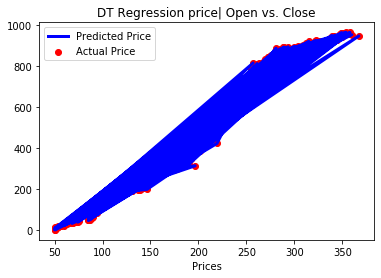

CPU times: user 175 ms, sys: 28.2 ms, total: 203 ms
Wall time: 203 ms


In [23]:
%%time
#Train Set Graph
print('Train-set /','R2 score:',r2_score(ytrain,regressor.predict(xtrain)))
plt.scatter(xtrain, ytrain, color='red', label= 'Actual Price') #plotting the initial datapoints
plt.plot(xtrain, regressor.predict(xtrain), color='blue', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title('DT Regression price| Open vs. Close')
plt.legend()
plt.xlabel('Prices')
plt.show()

Test-set/ R2 score: 0.9895719893725149


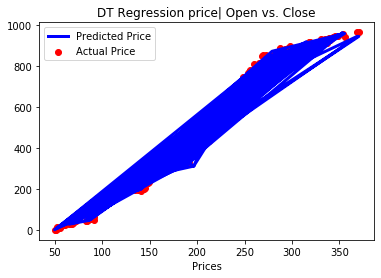

CPU times: user 212 ms, sys: 126 ms, total: 339 ms
Wall time: 412 ms


In [24]:
%%time
#Test Set Graph
print('Test-set/','R2 score:',r2_score(ytest,regressor.predict(xtest)))
plt.scatter(xtest, ytest, color='red', label= 'Actual Price') #plotting the initial datapoints
plt.plot(xtest, regressor.predict(xtest), color='blue', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title('DT Regression price| Open vs. Close')
plt.legend()
plt.xlabel('Prices')
plt.show()

In [25]:
%%time
from sklearn.metrics import mean_squared_error 
from math import sqrt

print('Train-set /','MSE score:',mean_squared_error(ytrain,regressor.predict(xtrain)))
print('Train-set /','RMSE score:',sqrt(mean_squared_error(ytrain,regressor.predict(xtrain))))

Train-set / MSE score: 6.046268656716418
Train-set / RMSE score: 2.45891615487727
CPU times: user 1.84 ms, sys: 935 µs, total: 2.78 ms
Wall time: 1.81 ms


In [26]:
%%time
print('Train-set /','MSE score:',mean_squared_error(ytest,regressor.predict(xtest)))
print('Train-set /','RMSE score:',sqrt(mean_squared_error(ytest,regressor.predict(xtest))))

Train-set / MSE score: 767.4719696969697
Train-set / RMSE score: 27.703284456846806
CPU times: user 1.7 ms, sys: 1.06 ms, total: 2.76 ms
Wall time: 1.75 ms
